# Simulate and Compare different Dynamics

In [130]:
from rumor_centrality import graph_generator

g = graph_generator.synthetic_internet(100)

In [131]:
from rumor_centrality import graph_simulations

steps = 10
infection_prob = 0.4
center_count = 1
infected_notes = 100


In [143]:
import networkx as nx
from rumor_centrality import rumor_detection


def predict_center(infected_graph_adj):
    return rumor_detection.get_center_prediction(rumor_detection.networkx_graph_to_adj_list(infected_graph_adj), use_fact=False)

def get_hop_distance(g, center: int, predicted_center: int):
    return nx.shortest_path_length(g, center, predicted_center)

def run_prediction(g):
    g_c = g.copy()
    g_si, center_si = graph_simulations.si(g_c, steps, infection_prob, center_count)
    g_c = g.copy()
    g_sir, center_sir = graph_simulations.sir(g_c, steps, infection_prob, 0.3, center_count)
    g_c = g.copy()
    g_sis, center_sis = graph_simulations.sis(g_c, steps, infection_prob, 0.1, center_count)

    infections = g_si, g_sir, g_sis
    centers = center_si, center_sir, center_sis

    results = []
    for infection, center in zip(infections, centers):
        if len(infection.nodes) == 0:
            results.append((None, len(infection.nodes)))
            continue

        predicted = predict_center(infection)
        hop_distance = get_hop_distance(g, center[0], predicted[0])
        results.append((hop_distance, len(infection.nodes)))
    return results

In [144]:
from tqdm import tqdm

predictions = []
for i in tqdm(range(100)):
    predictions.append(run_prediction(g))

frequencies = []
for i in range(3):
    values = [p[i][0] for p in predictions]
    values = [-1 if v is None else v for v in values]
    uniq_values = list(set(values))
    f = dict([(u, values.count(u)) for u in uniq_values])
    frequencies.append(f)

frequencies_nodes = []
for i in range(3):
    values = [p[i][1] for p in predictions]
    values = [-1 if v is None else v for v in values]
    uniq_values = list(set(values))
    f = dict([(u, values.count(u)) for u in uniq_values])
    frequencies_nodes.append(f)


100%|██████████| 100/100 [00:05<00:00, 19.25it/s]


Text(0.5, 0.98, 'Rumor Detection on different Dynamics, Synthetic_Internet(100), Steps=10')

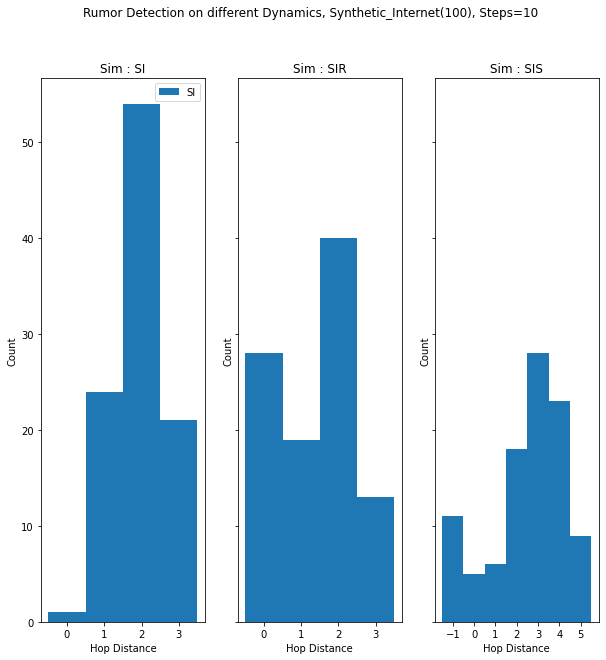

In [145]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(10,10))
simulations = 'SI', 'SIR', 'SIS'

for i, sim_name in enumerate(simulations):
    ax = axes[i]
    ax.bar(
        frequencies[i].keys(),
        frequencies[i].values(),
        label=sim_name,
        width=1,
    )

    ax.set_title(f"Sim : {sim_name}")
    ax.set_xlabel("Hop Distance")
    ax.set_ylabel("Count")

    ax.set_xticks(list(frequencies[i].keys()))

axes[0].legend()
fig.suptitle("Rumor Detection on different Dynamics, Synthetic_Internet(100), Steps=10")

Text(0.5, 0.98, 'Size of infected Graphs on different Dynamics, Synthetic_Internet(100), Steps=10')

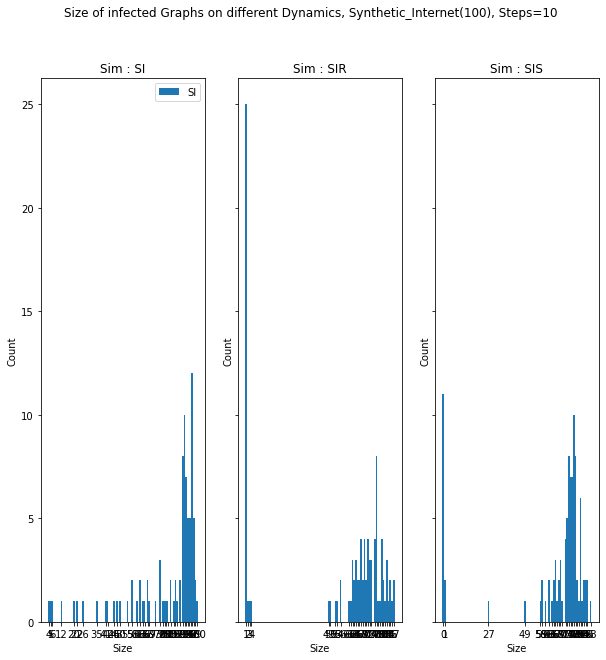

In [146]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(10,10))
simulations = 'SI', 'SIR', 'SIS'

for i, sim_name in enumerate(simulations):
    ax = axes[i]
    ax.bar(
        frequencies_nodes[i].keys(),
        frequencies_nodes[i].values(),
        label=sim_name,
        width=1,
    )

    ax.set_title(f"Sim : {sim_name}")
    ax.set_xlabel("Size")
    ax.set_ylabel("Count")

    ax.set_xticks(list(frequencies_nodes[i].keys()))

axes[0].legend()
fig.suptitle("Size of infected Graphs on different Dynamics, Synthetic_Internet(100), Steps=10")
